In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
pd.options.display.max_rows = 4000
pd.set_option('display.max_columns', 100)
import numpy as np
import pandas as pd
from time import time
from IPython.display import display 




In [2]:
df = pd.read_csv("adult.csv")  #reading in the csv file into a Pandas Data Frame
df.head(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,?,>50K


In [3]:
df.income.value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64

In [4]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [5]:
df.columns= df.columns.map(lambda x: x.replace('.', '_'))

In [6]:
for x in df.columns:
    df[x]= np.where(df[x]=='?', None, df[x])

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [7]:
df.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64

In [8]:
df.income.value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64

In [9]:
df['over_50k']= np.where(df['income']=='>50K', 1, 0)

In [10]:
df['age'].nunique()

73

In [11]:
df.over_50k.value_counts()

0    24720
1     7841
Name: over_50k, dtype: int64

In [12]:
df['workclass'].unique()

array([None, 'Private', 'State-gov', 'Federal-gov', 'Self-emp-not-inc',
       'Self-emp-inc', 'Local-gov', 'Without-pay', 'Never-worked'],
      dtype=object)

The maximum age is 90
The minimum age is 17


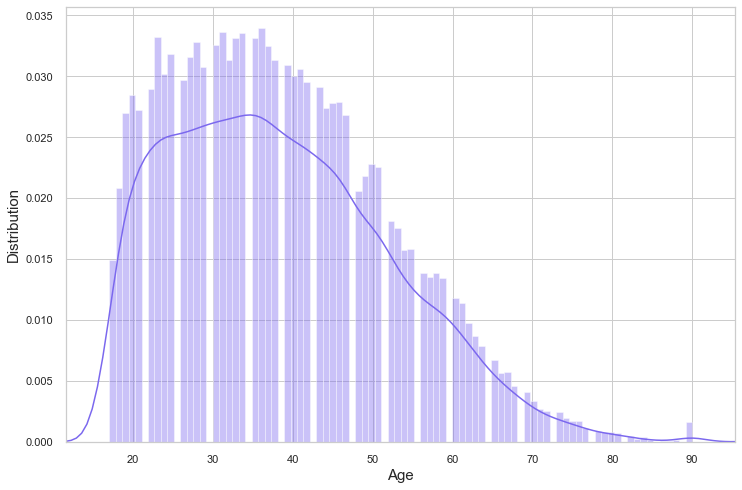

In [13]:
# This distribution plot shows the distribution of Age of people across the Data Set
plt.rcParams['figure.figsize'] = [12, 8]
sns.set(style = 'whitegrid')

sns.distplot(df['age'], bins = 90, color = 'mediumslateblue')
plt.ylabel("Distribution", fontsize = 15)
plt.xlabel("Age", fontsize = 15 )

plt.margins(x = 0)

print ("The maximum age is", df['age'].max())
print ("The minimum age is", df['age'].min())

In [14]:
plt.style.use('seaborn')
pd.options.display.max_rows = 4000
pd.set_option('display.max_columns', 100)

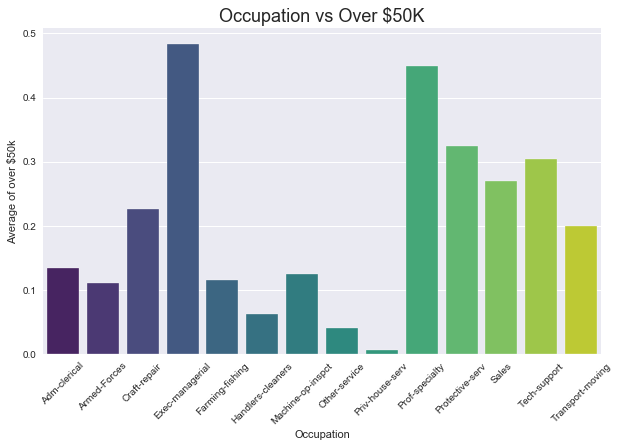

In [15]:
plt.figure(figsize = (10,6))
y = df.groupby(['occupation']).over_50k.mean();
x = y.index
sns.barplot(x,y, palette='viridis')
sns.set(style='darkgrid')
plt.title('Occupation vs Over $50K', fontsize=18);
plt.xlabel('Occupation');
plt.xticks(rotation=45)
plt.ylabel('Average of over $50k');
# plt.suptitle(, fontsize=12);

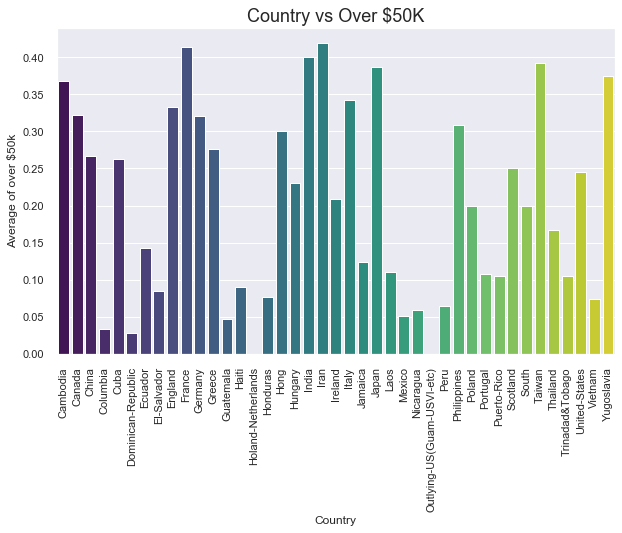

In [16]:
plt.figure(figsize = (10,6))
y = df.groupby(['native_country']).over_50k.mean();
x = y.index
sns.barplot(x,y, palette='viridis')
sns.set(style='darkgrid')
plt.title('Country vs Over $50K', fontsize=18);
plt.xlabel('Country');
plt.xticks(rotation=90)
plt.ylabel('Average of over $50k');
# plt.suptitle(, fontsize=12);

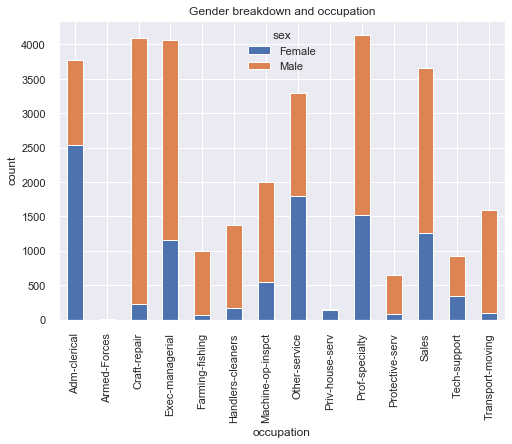

In [17]:
df.groupby(['occupation','sex']).occupation.count().unstack().plot.bar(stacked=True, );
plt.title('Gender breakdown and occupation');
plt.xlabel('occupation');
plt.ylabel('count');

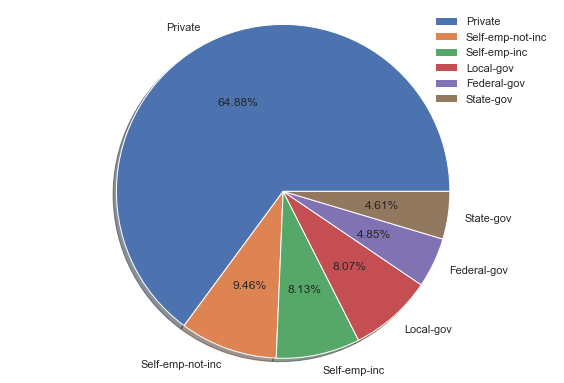

In [23]:
# Creating Pandas Series for the workclasses whose income is higher than 50K 
df_wc = df.loc[df['income'] == '>50K',['workclass']]
workclass_types = df_wc['workclass'].value_counts()
labels = list(workclass_types.index)
aggregate = list(workclass_types)
# This Pie chat shows the Percentage of different workclass who earns more than 50K
plt.pie(aggregate, labels = labels, autopct='%1.2f%%', shadow=True)
plt.legend(labels, loc = 'best')
plt.axis('equal')
plt.tight_layout()
plt.show()

In [27]:
df2.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,over_50k
0,90,None,77053,HS-grad,9,Widowed,None,Not-in-family,White,Female,0,4356,40,United-States,<=50K,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K,0
2,66,None,186061,Some-college,10,Widowed,None,Unmarried,Black,Female,0,4356,40,United-States,<=50K,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K,0


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  object
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  object
 3   education       32561 non-null  object
 4   education_num   32561 non-null  object
 5   marital_status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  object
 11  capital_loss    32561 non-null  object
 12  hours_per_week  32561 non-null  object
 13  native_country  31978 non-null  object
 14  income          32561 non-null  object
 15  over_50k        32561 non-null  int64 
dtypes: int64(1), object(15)
memory usage: 4.0+ MB


In [20]:
df2 = df[df.occupation != None]

df2['occupation'].value_counts()


Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

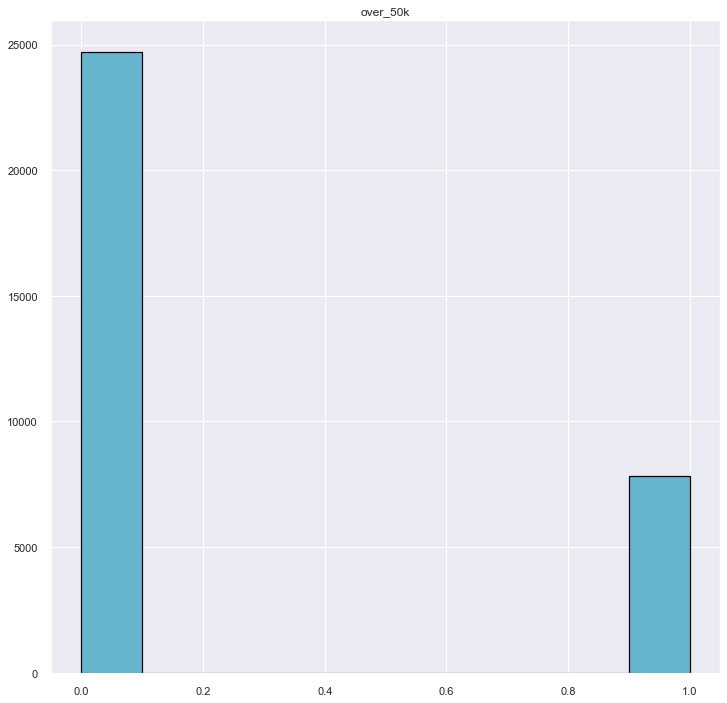

In [28]:
# Distribution of Different Features of the Dataset
distribution = df2.hist(edgecolor = 'black', linewidth = 1.2, color = 'c')
fig = plt.gcf()
fig.set_size_inches(12,12)
plt.show()

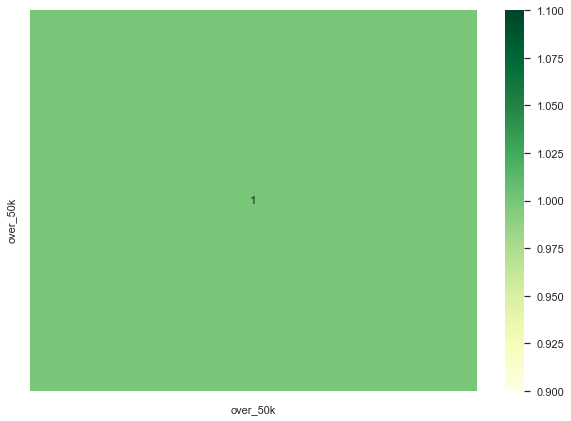

In [29]:
# This heatmap shows the Correlation between the different variables
plt.rcParams['figure.figsize'] = [10,7]
sns.heatmap(df2.corr(), annot = True, color = 'blue', cmap = 'YlGn');

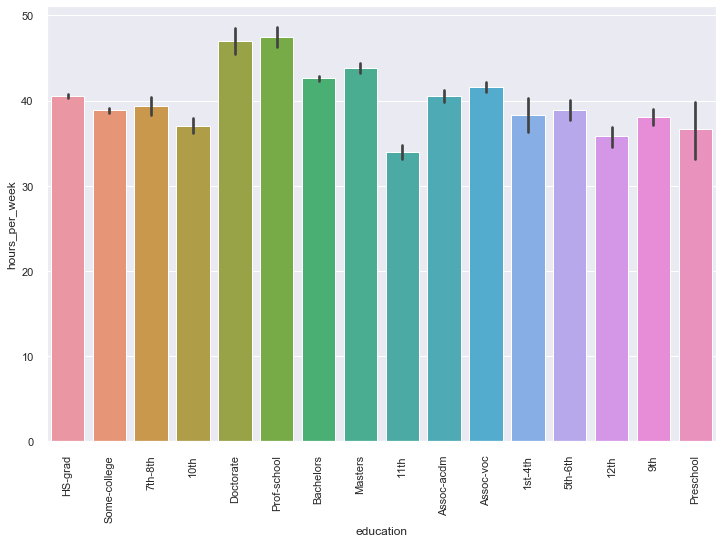

In [33]:
# This shows the hours per week according to the education of the person
sns.set(rc={'figure.figsize':(12,8)})
sns_grad = sns.barplot(x = df['education'], y = df['hours_per_week'], data = df)
plt.setp(sns_grad.get_xticklabels(), rotation=90);

In [36]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import *
from IPython.core.display import display, HTML

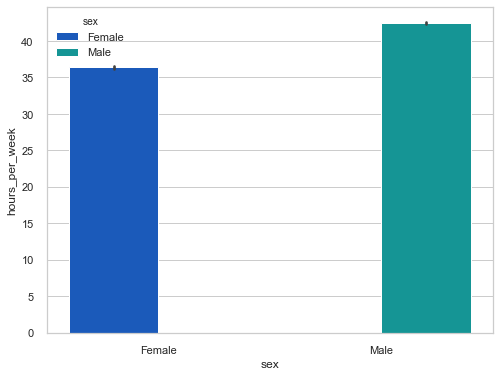

In [37]:
# This bar graph shows the difference of hours per week between male and female 
sns.set(style = 'whitegrid', rc={'figure.figsize':(8,6)})
sns.barplot(x = df['sex'], y = df['hours_per_week'], data = df,
            estimator = mean, hue = 'sex', palette = 'winter');

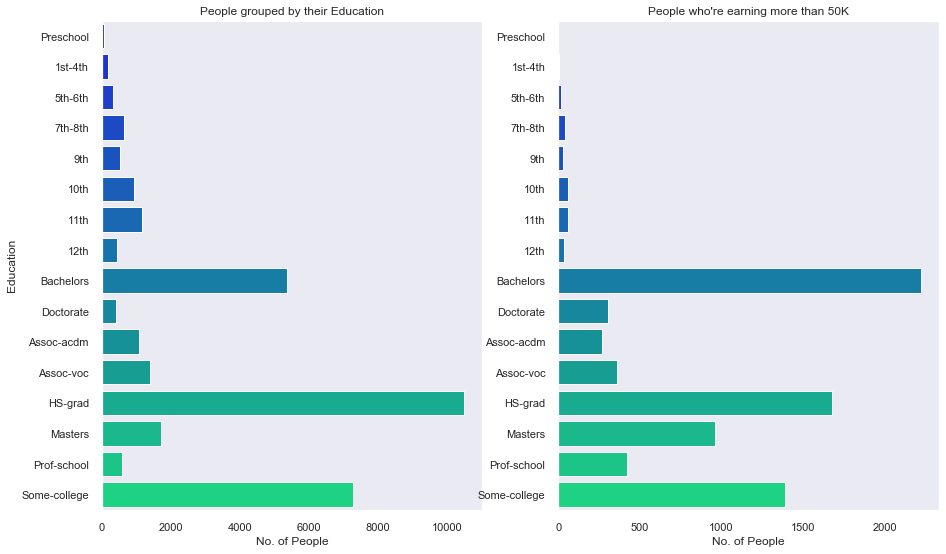

In [38]:
# Grouping people by their education
education_size = df.groupby('education').size()

# Grouping people who earns more than 50K by their education
more_income = df.loc[df['income'] == '>50K', ['education']].groupby('education').size()

sns.set(style = 'dark')
plt.rcParams['figure.figsize'] = [15, 9]
fig, ax = plt.subplots(1,2)

# Setting axes Labels and Titles
ax[0].set_ylabel("Education")
ax[0].set_xlabel("No. of People")
ax[1].set_xlabel("No. of People")
ax[0].title.set_text("People grouped by their Education")
ax[1].title.set_text("People who're earning more than 50K")

# Barplot for the people grouped by their education
sns_ed_1 = sns.barplot(x = list(education_size), y = list(education_size.index), palette = 'winter',
                       order = ['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th', 'Bachelors', 'Doctorate',
                                'Assoc-acdm', 'Assoc-voc', 'HS-grad', 'Masters', 'Prof-school', 'Some-college'], ax = ax[0])

# Barplot for the people who earns more than 50K grouped by their education
sns_ed_2 = sns.barplot(x = list(more_income), y = list(more_income.index), palette = 'winter',
                       order = ['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th', 'Bachelors', 'Doctorate',
                                'Assoc-acdm', 'Assoc-voc', 'HS-grad', 'Masters', 'Prof-school', 'Some-college'], ax = ax[1])


TypeError: No loop matching the specified signature and casting was found for ufunc add

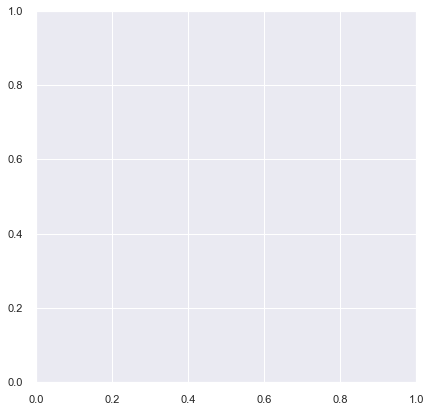

In [40]:
plt.rcParams['figure.figsize'] = [15,15]
sns.set(style = 'darkgrid')

# This Violin plot show how capital gain, loss, hours per week and education vary with the race of the people
plt.subplot(2,2,1)
sns.violinplot(x = df['race'], y = df['capital_gain'], data = df);
plt.subplot(2,2,2)
sns.violinplot(x = df['race'], y = df['capital_loss'], data = df);
plt.subplot(2,2,3)
sns.violinplot(x = df['race'], y = df['hours_per_week'], data = df);
plt.subplot(2,2,4)
sns.violinplot(x = df['race'], y = df['education_num'], data = df);

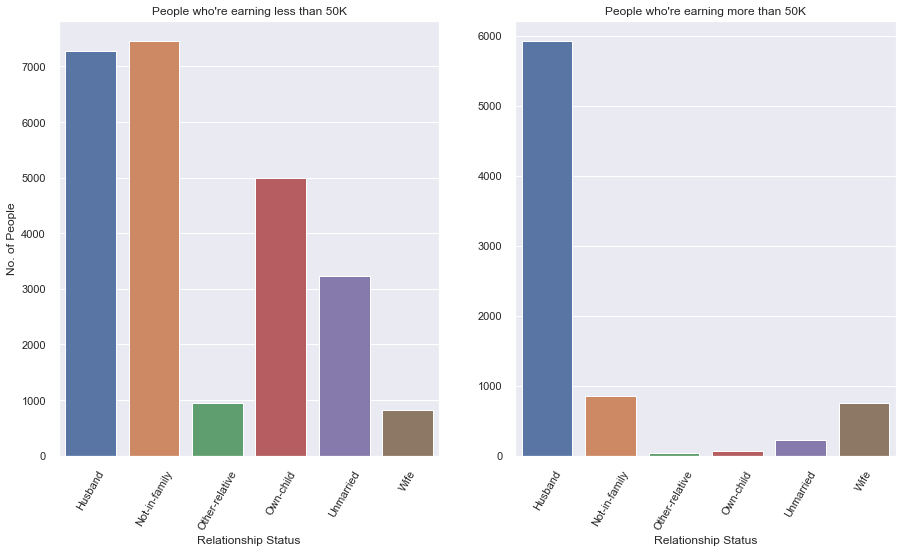

In [42]:
# Setting Parameters
plt.rcParams['figure.figsize'] = [15,8]
fig, ax = plt.subplots(1,2)

# Setting axes Labels and Titles
ax[0].set_ylabel("No. of People")
ax[0].set_xlabel("Relationship Status")
ax[1].set_xlabel("Relationship Status")
ax[0].title.set_text("People who're earning less than 50K")
ax[1].title.set_text("People who're earning more than 50K")

# Grouping people according to their Income and Relationship Status 
rel_less = df.loc[df['income'] == '<=50K',['relationship']].groupby('relationship').size()
rel_more = df.loc[df['income'] == '>50K',['relationship']].groupby('relationship').size()

# This barplot shows the No.of people earning more or less than 50K according to their Relationship Status
sns_rel_1 = sns.barplot(x = list(rel_less.index), y = list(rel_less), ax = ax[0])
sns_rel_2= sns.barplot(x = list(rel_more.index), y = list(rel_more), ax = ax[1])

plt.setp(sns_rel_1.get_xticklabels(), rotation = 60);
plt.setp(sns_rel_2.get_xticklabels(), rotation = 60);
